In [125]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import scipy.stats as stats
from datetime import timedelta
from collections import Counter


In [5]:
deli_cup = pd.read_csv('../Data/deli_cup.csv')
deli_cup

,Container Number,Container Type,Project,Field ID,Treatment,Collection Date,Seed Type,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,SCM Seed,Phorid Seed,Other Damage,Wireworms,Other Seeds,Wireworm Presence/absence,Grub presence/absence,Checked?,Ordered Entered,Notes
0,25_D_1181,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,14.0,1,0,0,0,1,3,0,YES,YES,Y,294,NaN
1,25_D_1182,DELI,R,CER_DEL_1,FUNG,5/28/25,FIELD CORN,14.0,0,0,0,0,0,0,0,NO,NO,Y,293,NaN
2,25_D_1183,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,17.0,2,0,0,0,0,0,0,NO,NO,Y,380,NaN
3,25_D_1184,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,15.0,0,0,0,0,0,0,0,NO,NO,Y,308,NaN
4,25_D_1185,DELI,R,CER_DEL_1,FUNG,5/28/25,FIELD CORN,15.0,2,0,0,0,0,0,0,NO,NO,Y,51,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,25_D_2513,DELI,R,ZUE_VOT,FUNG,7/4/25,SNAP,15.0,0,0,0,0,0,0,0,NO,NO,Y,712,NaN
982,25_D_2514,DELI,R,ZUE_VOT,FUNG,7/3/25,SNAP,15.0,0,0,0,0,0,0,0,NO,NO,Y,710,NaN
983,25_D_2515,DELI,R,ZUE_VOT,FUNG,7/8/25,SNAP,15.0,0,0,0,0,0,0,0,NO,NO,Y,716,NaN
984,25_D_2516,DELI,R,ZUE_VOT,FUNG,7/6/25,SNAP,15.0,0,0,0,0,0,0,0,NO,NO,Y,714,NaN


In [75]:
stand = pd.read_csv('../Data/stand_loss.csv')
stand

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Stand count,Notes
0,Paul Cerosaletti,CER_DEL_1,6/16/25,VE/V1,Field corn,Neonic,1,VE/V1,29.0,NaN
1,Paul Cerosaletti,CER_DEL_1,6/16/25,VE/V1,Field corn,Neonic,2,VE/V1,30.0,NaN
2,Paul Cerosaletti,CER_DEL_1,6/16/25,VE/V1,Field corn,Neonic,3,VE/V1,24.0,NaN
3,Paul Cerosaletti,CER_DEL_1,6/16/25,VE/V1,Field corn,Neonic,4,VE/V1,29.0,NaN
4,Paul Cerosaletti,CER_DEL_1,6/16/25,VE/V1,Field corn,Neonic,5,VE/V1,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1741,Marion Zuefle,ZUE_VOT,7/17/25,V3/V4,Snap bean,Fung,5,V2,113.0,NaN
1742,Marion Zuefle,ZUE_VOT,7/17/25,V3/V4,Snap bean,Fung,6,V1/V2,100.0,NaN
1743,Marion Zuefle,ZUE_VOT,7/17/25,V3/V4,Snap bean,Fung,7,V2,126.0,NaN
1744,Marion Zuefle,ZUE_VOT,7/17/25,V3/V4,Snap bean,Fung,8,V2,118.0,NaN


In [89]:
biomass = pd.read_csv('../Data/fresh_biomass.csv')
biomass

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Number of plants,Total weight (g),Notes,Untared weight (g)
0,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,1,V3,15,79.7,NaN,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,2,V3,15,73.8,NaN,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,3,V3,15,73.4,NaN,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,4,V3,15,78.6,NaN,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,5,V3,15,97.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
949,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,5,V4,15,45.5,NaN,NaN
950,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,6,V4,15,47.8,NaN,NaN
951,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,7,V4,15,48.2,NaN,NaN
952,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,8,V4,15,42.2,NaN,NaN


In [7]:
silage_yield = pd.read_csv('../Data/silage_yield.csv')
silage_yield

,Data Collector,Field ID,Date,Sampling period,Crop,Grain or Silage,Treatment,Yield (tons/acre),Yield (dry matter)
0,Natika Walters,KUH_COL,9/17/2025,Harvest,Field corn,Silage,Neonic,18.700,6.73
1,Natika Walters,KUH_COL,9/17/2025,Harvest,Field corn,Silage,Fung,18.500,6.43
2,Katelyn Miller,MIL_CRO_2,9/22/2025,Harvest,Field corn,Silage,Neonic,20.270,6.75
3,Katelyn Miller,MIL_CRO_2,9/22/2025,Harvest,Field corn,Silage,Fung,18.350,7.32
4,Katelyn Miller,MIL_CRO_1,9/22/2025,Harvest,Field corn,Silage,Neonic,30.610,9.00
5,Katelyn Miller,MIL_CRO_1,9/22/2025,Harvest,Field corn,Silage,Fung,27.920,8.51
6,Erik Smith,SMI_LAT,10/15/2025,Harvest,Field corn,Silage,Neonic,15.770,6.49
7,Erik Smith,SMI_LAT,10/15/2025,Harvest,Field corn,Silage,Fung,17.233,6.42
8,Jodi Letham,LET_STE,9/29/2025,Harvest,Field corn,Silage,Neonic,12.160,4.40
9,Jodi Letham,LET_STE,9/29/2025,Harvest,Field corn,Silage,Fung,16.410,5.94


In [8]:
grain_yield = pd.read_csv('../Data/grain_yield.csv')
grain_yield

,Data Collector,Field ID,Date,Sampling period,Crop,Grain or Silage,Treatment,Yield (bu/acre)
0,Mike Stanyard,STA_MAR,10/27/2025,Harvest,Field corn,Grain,Neonic,187.6695
1,Mike Stanyard,STA_MAR,10/27/2025,Harvest,Field corn,Grain,Fung,190.9152
2,Mike Stanyard,STA_WIL,10/24/2025,Harvest,Field corn,Grain,Neonic,178.2600
3,Mike Stanyard,STA_WIL,10/24/2025,Harvest,Field corn,Grain,Fung,229.9200
4,Katelyn Miller,MIL_ZIT_2,11/7/2025,Harvest,Field corn,Grain,Neonic,118.1000
5,Katelyn Miller,MIL_ZIT_2,11/7/2025,Harvest,Field corn,Grain,Fung,93.0700
6,Katelyn Miller,MIL_ZIT_3,11/25/2025,Harvest,Field corn,Grain,Neonic,124.0000
7,Katelyn Miller,MIL_ZIT_3,11/25/2025,Harvest,Field corn,Grain,Fung,134.8000
8,Janice Degni,DEG_FRI_1,11/4/2025,Harvest,Field corn,Grain,Neonic,87.0700
9,Janice Degni,DEG_FRI_1,11/4/2025,Harvest,Field corn,Grain,Fung,42.3900


In [9]:
soy_yield = pd.read_csv('../Data/soybean_yield.csv')
soy_yield

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Yield (bu/acre)
0,Katelyn Miller,MIL_COB,10/17/2025,Harvest,Soybean,Neonic,57.50
1,Katelyn Miller,MIL_COB,10/17/2025,Harvest,Soybean,Fung,54.70
2,Erik Smith,SMI_ARN_2,10/27/2025,Harvest,Soybean,Neonic,32.52
3,Erik Smith,SMI_ARN_2,10/27/2025,Harvest,Soybean,Fung,33.81
4,Janice Degni,DEG_LAF_2,10/15/2025,Harvest,Soybean,Neonic,50.99
5,Janice Degni,DEG_LAF_2,10/15/2025,Harvest,Soybean,Fung,42.18
6,Mike Stanyard,STA_FRE,10/6/2025,Harvest,Soybean,Neonic,35.70
7,Mike Stanyard,STA_FRE,10/6/2025,Harvest,Soybean,Fung,40.26
8,Mike Stanyard,STA_REE_2,9/30/2025,Harvest,Soybean,Neonic,48.43
9,Mike Stanyard,STA_REE_2,9/30/2025,Harvest,Soybean,Fung,57.79


In [10]:
deli_cup['Total SCM'] = deli_cup['SCM Larvae Sum'] + deli_cup['SCM Pupae Sum']
field_deli_cup = deli_cup[(deli_cup['Seed Type'] != 'SWEET CORN') & (deli_cup['Seed Type'] != 'SNAP')]

field_deli_cup['Treatment'] = field_deli_cup['Treatment'].replace({'NEONIC': 'Treated', 'FUNG': 'Untreated'})
field_deli_cup['Seed Type'] = field_deli_cup['Seed Type'].replace({'FIELD CORN': 'Field corn', 'SOY': 'Soybean'})
field_deli_cup = field_deli_cup.rename(columns={'Seed Type': 'Crop'})

field_deli_cup['Avg SCM'] = field_deli_cup['Total SCM'] / field_deli_cup['Number Seeds']

field_deli_cup

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/789136071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_deli_cup['Treatment'] = field_deli_cup['Treatment'].replace({'NEONIC': 'Treated', 'FUNG': 'Untreated'})
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/789136071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_deli_cup['Seed Type'] = field_deli_cup['Seed Type'].replace({'FIELD CORN': 'Field corn', 'SOY': 'Soybean'})


,Container Number,Container Type,Project,Field ID,Treatment,Collection Date,Crop,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,...,Other Damage,Wireworms,Other Seeds,Wireworm Presence/absence,Grub presence/absence,Checked?,Ordered Entered,Notes,Total SCM,Avg SCM
0,25_D_1181,DELI,R,CER_DEL_1,Treated,5/28/25,Field corn,14.0,1,0,...,1,3,0,YES,YES,Y,294,NaN,1,0.071429
1,25_D_1182,DELI,R,CER_DEL_1,Untreated,5/28/25,Field corn,14.0,0,0,...,0,0,0,NO,NO,Y,293,NaN,0,0.000000
2,25_D_1183,DELI,R,CER_DEL_1,Treated,5/28/25,Field corn,17.0,2,0,...,0,0,0,NO,NO,Y,380,NaN,2,0.117647
3,25_D_1184,DELI,R,CER_DEL_1,Treated,5/28/25,Field corn,15.0,0,0,...,0,0,0,NO,NO,Y,308,NaN,0,0.000000
4,25_D_1185,DELI,R,CER_DEL_1,Untreated,5/28/25,Field corn,15.0,2,0,...,0,0,0,NO,NO,Y,51,NaN,2,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,25_D_1158,DELI,R,STA_WOO,Untreated,5/23/25,Field corn,15.0,1,1,...,0,1,1,YES,NO,Y,15,NaN,2,0.133333
946,25_D_1159,DELI,R,STA_WOO,Treated,5/23/25,Field corn,15.0,0,0,...,0,0,0,NO,NO,Y,296,NaN,0,0.000000
947,25_D_1160,DELI,R,STA_WOO,Treated,5/23/25,Field corn,15.0,0,0,...,0,0,0,NO,NO,Y,295,NaN,0,0.000000
948,25_D_1161,DELI,R,STA_WOO,Untreated,5/23/25,Field corn,15.0,3,0,...,1,0,1,NO,NO,Y,3,NaN,3,0.200000


In [15]:
sites = field_deli_cup['Field ID'].unique()
sites

array(['CER_DEL_1', 'CER_DEL_2', 'CHO_GEN', 'DEG_DIE', 'DEG_FOU',
       'DEG_FRI_1', 'DEG_FRI_2', 'DEG_LAF_1', 'DEG_LAF_2', 'DEG_PER_1',
       'DEG_PER_2', 'DEG_VIL', 'HUN_REE', 'KUH_COL', 'LET_MAC',
       'LET_STE_1', 'LET_STE_2', 'LET_VER', 'LET_WAT', 'MIL_BAR_1',
       'MIL_BAR_2', 'MIL_COB', 'MIL_CRO_1', 'MIL_CRO_2', 'MIL_TEL',
       'MIL_ZIT_1', 'MIL_ZIT_2', 'MIL_ZIT_3', 'SMI_ARN_1', 'SMI_ARN_2',
       'SMI_BUR', 'SMI_COB', 'SMI_CON_1', 'SMI_CON_2', 'SMI_DOU',
       'SMI_HOF_1', 'SMI_HOF_2', 'SMI_LAT', 'SMI_MCC', 'STA_BLO',
       'STA_FRE', 'STA_KRE', 'STA_MAC', 'STA_MAR', 'STA_REE_1',
       'STA_REE_2', 'STA_STA', 'STA_WIL', 'STA_WOO'], dtype=object)

In [128]:
crop_dict = pd.Series(field_deli_cup.Crop.values, index = field_deli_cup['Field ID']).to_dict()
print(Counter(crop_dict.values()))
crop_dict

Counter({'Field corn': 33, 'Soybean': 16})


{'CER_DEL_1': 'Field corn',
 'CER_DEL_2': 'Field corn',
 'CHO_GEN': 'Soybean',
 'DEG_DIE': 'Field corn',
 'DEG_FOU': 'Field corn',
 'DEG_FRI_1': 'Field corn',
 'DEG_FRI_2': 'Soybean',
 'DEG_LAF_1': 'Field corn',
 'DEG_LAF_2': 'Soybean',
 'DEG_PER_1': 'Field corn',
 'DEG_PER_2': 'Soybean',
 'DEG_VIL': 'Field corn',
 'HUN_REE': 'Soybean',
 'KUH_COL': 'Field corn',
 'LET_MAC': 'Field corn',
 'LET_STE_1': 'Field corn',
 'LET_STE_2': 'Field corn',
 'LET_VER': 'Field corn',
 'LET_WAT': 'Field corn',
 'MIL_BAR_1': 'Soybean',
 'MIL_BAR_2': 'Soybean',
 'MIL_COB': 'Soybean',
 'MIL_CRO_1': 'Field corn',
 'MIL_CRO_2': 'Field corn',
 'MIL_TEL': 'Field corn',
 'MIL_ZIT_1': 'Soybean',
 'MIL_ZIT_2': 'Field corn',
 'MIL_ZIT_3': 'Field corn',
 'SMI_ARN_1': 'Field corn',
 'SMI_ARN_2': 'Soybean',
 'SMI_BUR': 'Field corn',
 'SMI_COB': 'Field corn',
 'SMI_CON_1': 'Soybean',
 'SMI_CON_2': 'Field corn',
 'SMI_DOU': 'Soybean',
 'SMI_HOF_1': 'Field corn',
 'SMI_HOF_2': 'Soybean',
 'SMI_LAT': 'Field corn',
 'SMI

In [61]:
table_name = 'SMI_DOU' + '_scm'
table_name = field_deli_cup.loc[field_deli_cup['Field ID'] == 'SMI_DOU']
table_name = table_name.groupby('Treatment').mean('Avg SCM').reset_index()
table_name['Crop'] = crop_dict['SMI_DOU']
table_name


,Treatment,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,SCM Seed,Phorid Seed,Other Damage,Wireworms,Other Seeds,Total SCM,Avg SCM,Crop
0,Treated,14.555556,1.333333,0.333333,0.555556,0.0,1.888889,0.333333,2.111111,1.666667,0.116484,Soybean
1,Untreated,15.333333,3.777778,0.000000,2.111111,0.0,2.111111,0.000000,2.111111,3.777778,0.250926,Soybean


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/228560667.py:13: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Avg SCM', hue='Treatment', dodge=True, palette= ['yellow'], size = 15, jitter=False,


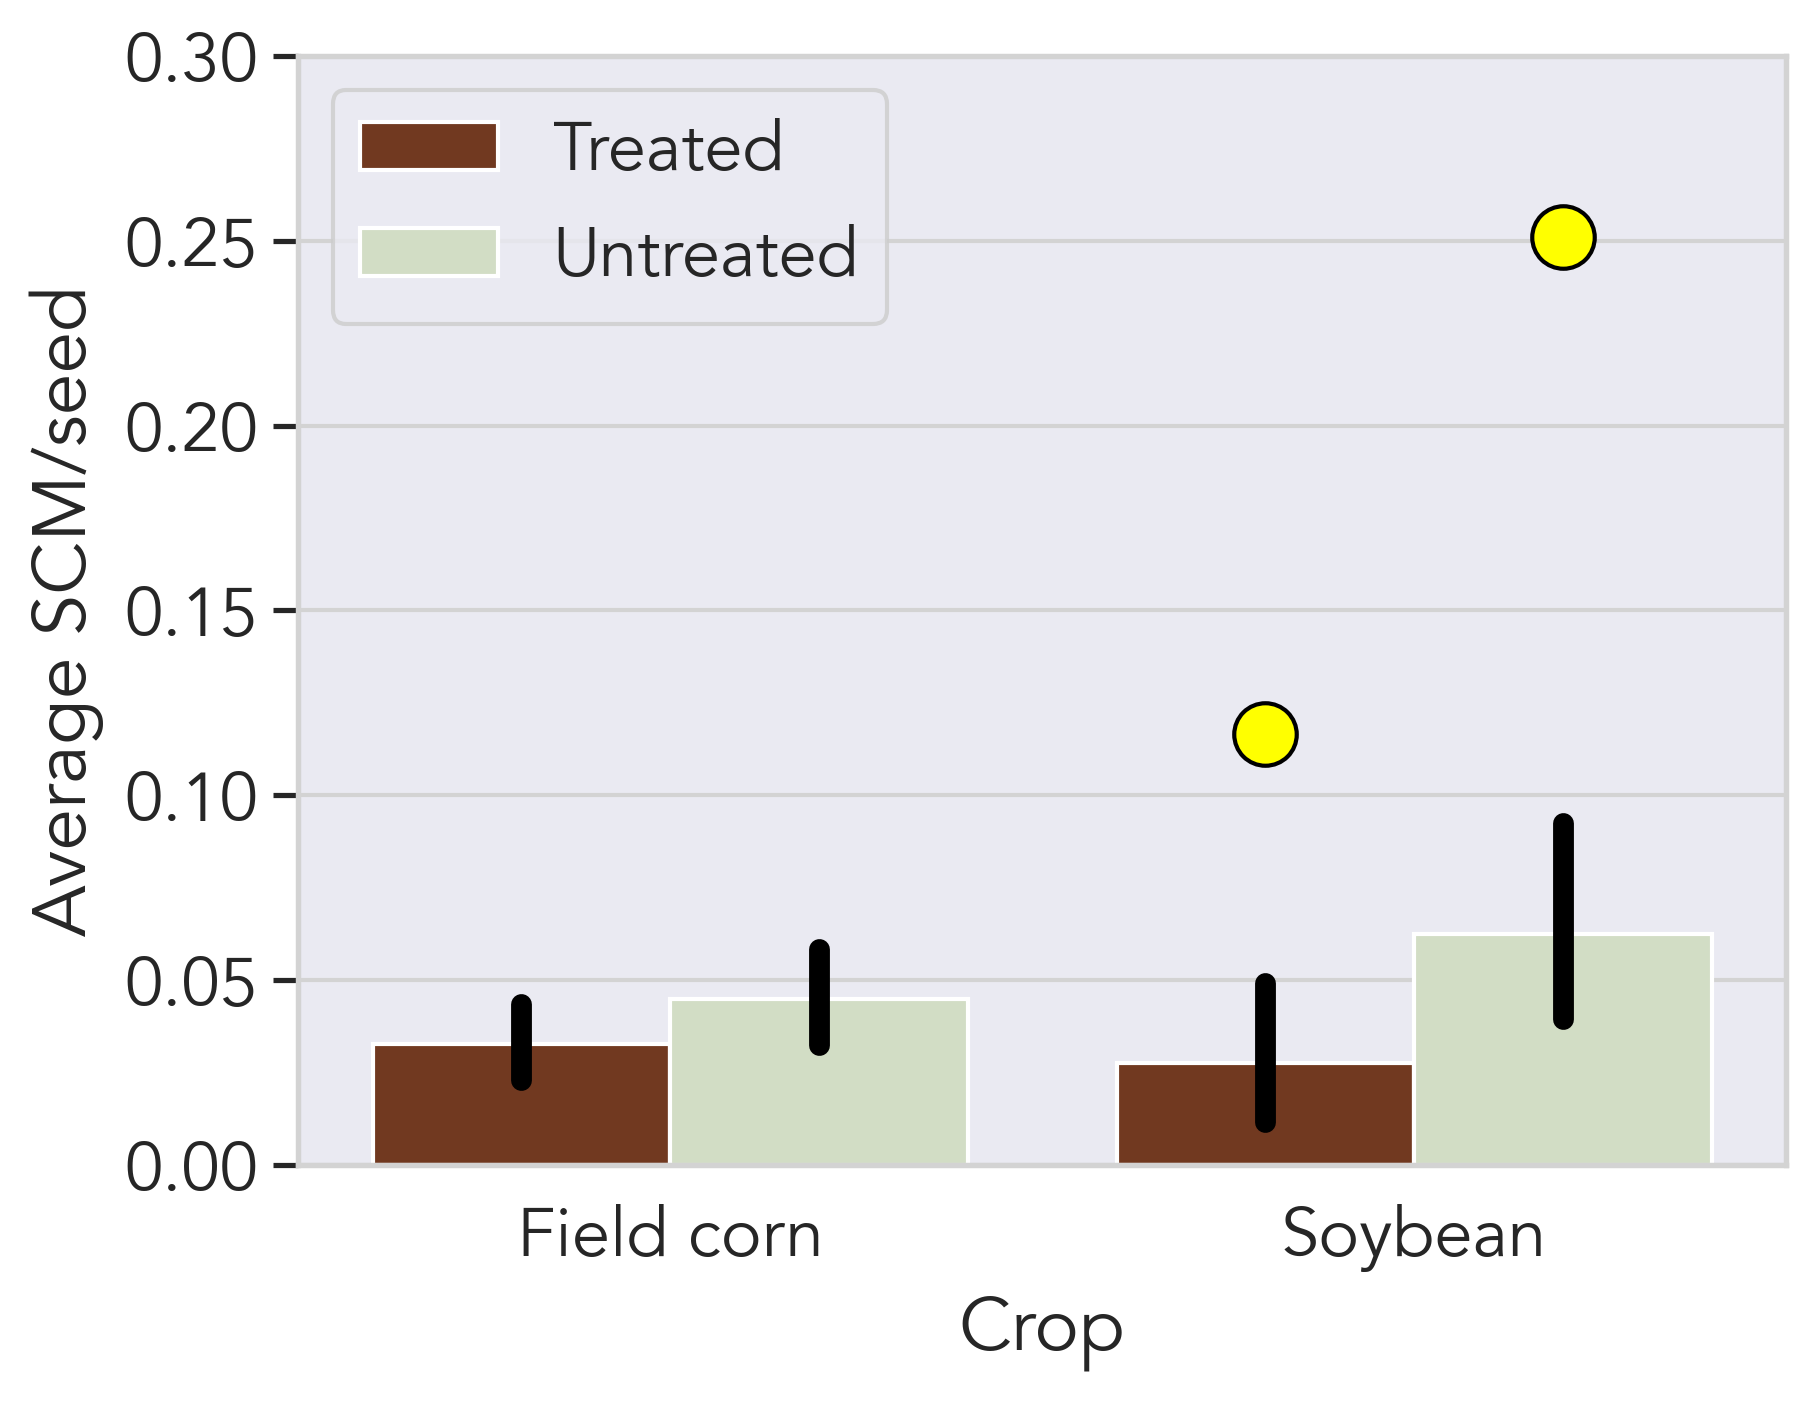

In [62]:
plt.figure()
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = field_deli_cup, x = 'Crop', y = 'Avg SCM', hue = 'Treatment', palette=palette, hue_order=hue_order, err_kws={'linewidth': 5, 'color':'black'})
plt.ylabel('Average SCM/seed')
plt.legend(loc='upper left')
plt.ylim(0, 0.3)

ax2 = ax.twinx()
sns.stripplot(data=table_name, x='Crop', y='Avg SCM', hue='Treatment', dodge=True, palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
plt.ylim(0, 0.3)
plt.ylabel('')
ax2.set_yticks([])

plt.savefig('Deli Cup Graphs/' + 'SMI_DOU' + '_deli_cup.png')


(0.0, 0.1)

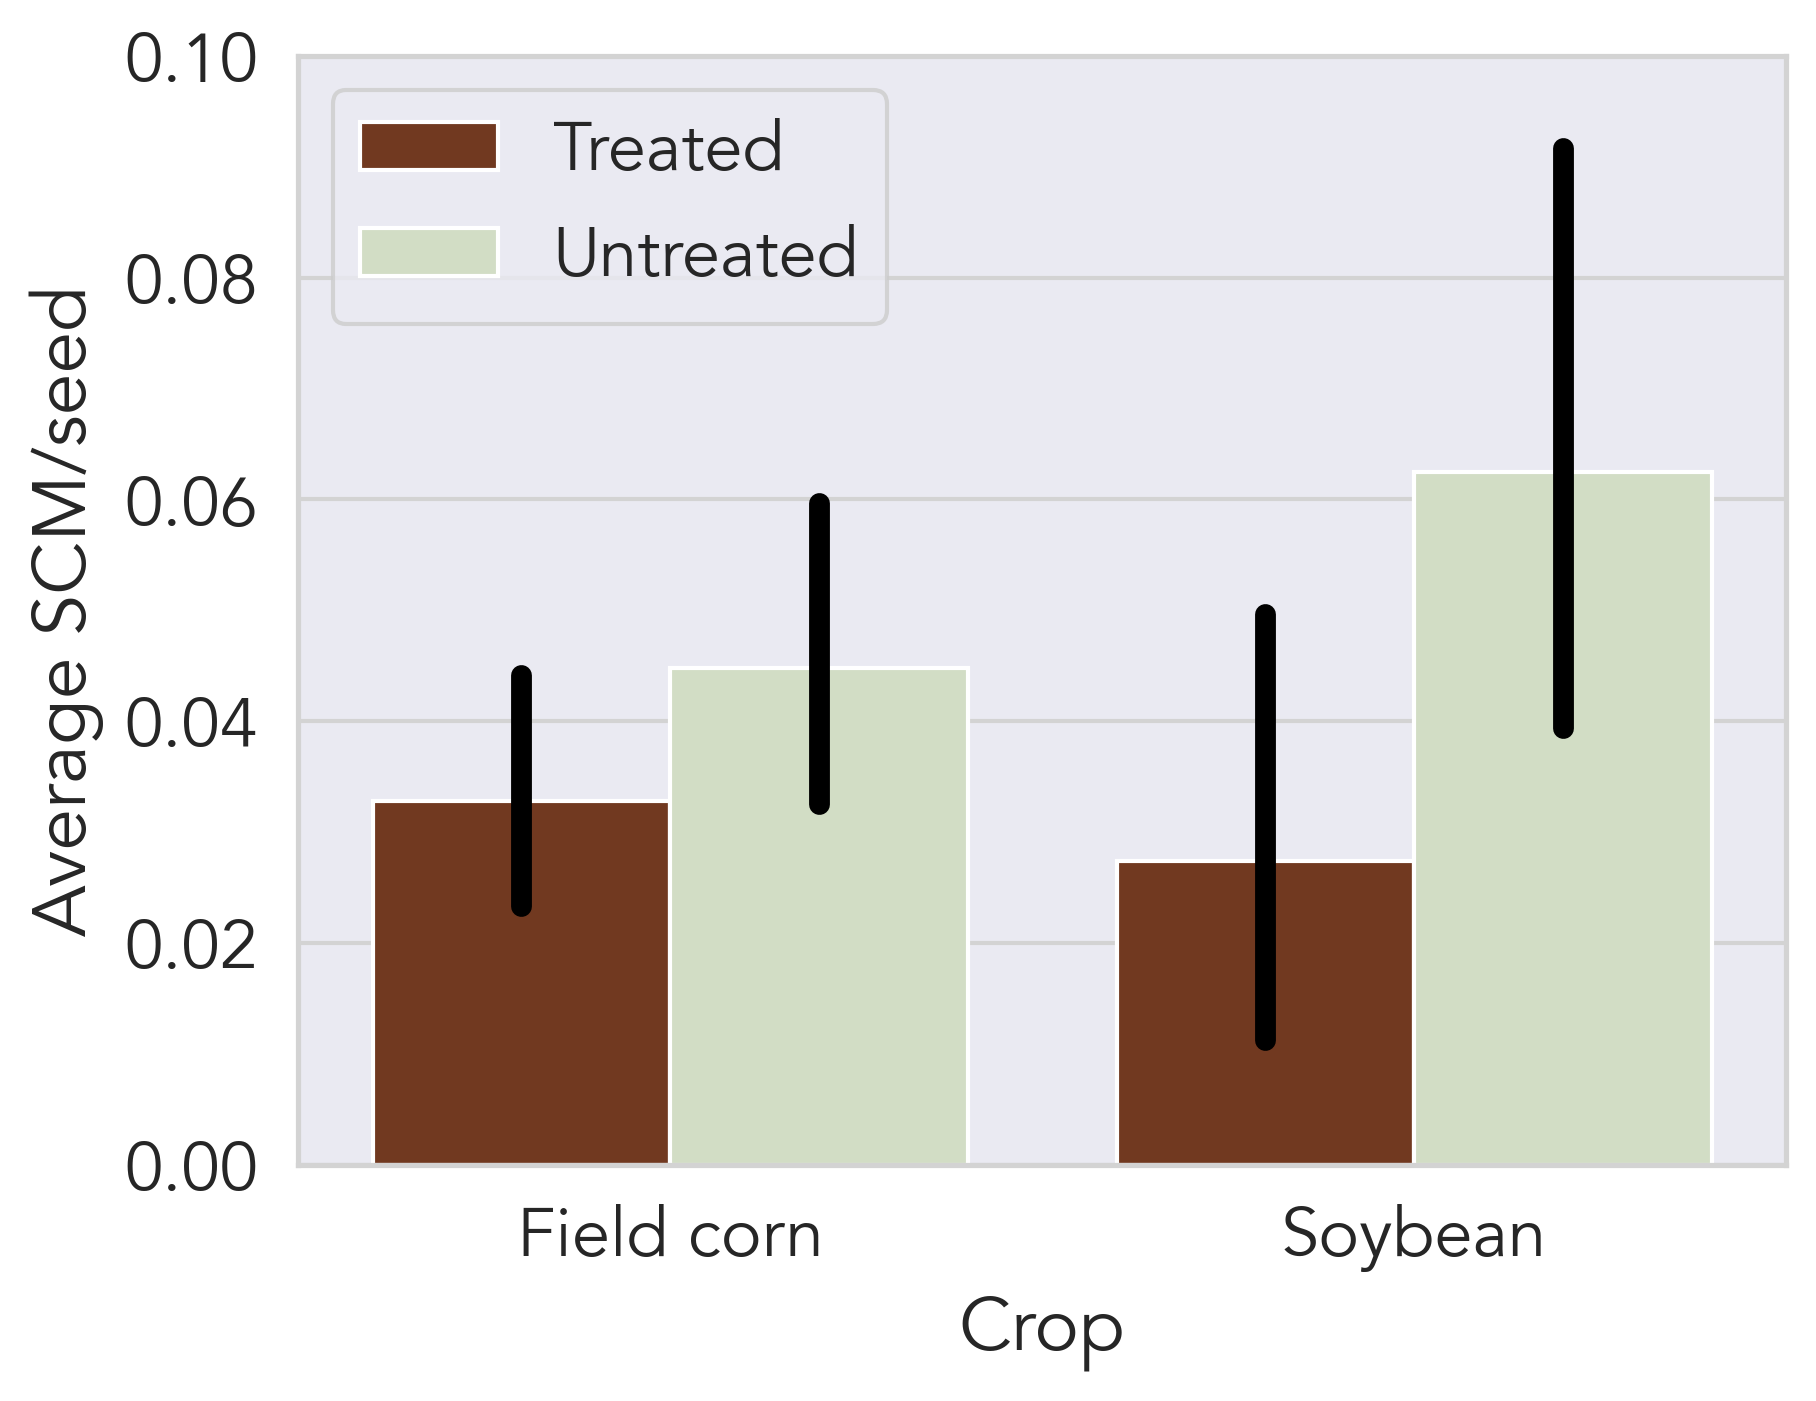

In [131]:
plt.figure()
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = field_deli_cup, x = 'Crop', y = 'Avg SCM', hue = 'Treatment', palette=palette, hue_order=hue_order, err_kws={'linewidth': 5, 'color':'black'})
plt.ylabel('Average SCM/seed')
plt.legend(loc='upper left')
plt.ylim(0, 0.1)

In [59]:
for site in sites: 
    table_name = site + '_scm'
    table_name = field_deli_cup.loc[field_deli_cup['Field ID'] == site]
    table_name = table_name.groupby('Treatment').mean('Avg SCM').reset_index()
    table_name['Crop'] = crop_dict[site]

    plt.figure()
    plt.rcParams.update({"figure.dpi": 300})
    sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

    palette = ['#7e3412', '#d2e1c1']
    hue_order = ['Treated', 'Untreated']
    ax = sns.barplot(data = field_deli_cup, x = 'Crop', y = 'Avg SCM', hue = 'Treatment', palette=palette, hue_order=hue_order, err_kws={'linewidth': 5, 'color':'black'})
    plt.ylabel('Average SCM/seed')
    plt.ylim(0, 0.3)

    ax2 = ax.twinx()
    sns.stripplot(data=table_name, x='Crop', y='Avg SCM', hue='Treatment', dodge=True, palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
    plt.ylim(0, 0.3)
    plt.ylabel('')
    ax2.set_yticks([])

    plt.tight_layout()
    plt.savefig('Deli Cup Graphs/' + site + '_deli_cup.png')
    plt.close()

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/2722605659.py:18: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Avg SCM', hue='Treatment', dodge=True, palette= ['yellow'], size = 15, jitter=False,
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/2722605659.py:18: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Avg SCM', hue='Treatment', dodge=True, palette= ['yellow'], size = 15, jitter=False,
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/2722605659.py:18: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Avg SCM', hue='Treatment', dodge=True, palette= ['yellow'], si

In [77]:
field_crop_stand = stand[(stand['Crop'] != 'Sweet corn') & (stand['Crop'] != 'Snap bean')]
field_crop_stand

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Stand count,Notes
0,Paul Cerosaletti,CER_DEL_1,6/16/25,VE/V1,Field corn,Neonic,1,VE/V1,29.0,NaN
1,Paul Cerosaletti,CER_DEL_1,6/16/25,VE/V1,Field corn,Neonic,2,VE/V1,30.0,NaN
2,Paul Cerosaletti,CER_DEL_1,6/16/25,VE/V1,Field corn,Neonic,3,VE/V1,24.0,NaN
3,Paul Cerosaletti,CER_DEL_1,6/16/25,VE/V1,Field corn,Neonic,4,VE/V1,29.0,NaN
4,Paul Cerosaletti,CER_DEL_1,6/16/25,VE/V1,Field corn,Neonic,5,VE/V1,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1669,Mike Stanyard,STA_WOO,6/13/25,V3/V4,Field corn,Fung,5,V3,28.0,NaN
1670,Mike Stanyard,STA_WOO,6/13/25,V3/V4,Field corn,Fung,6,V3,31.0,NaN
1671,Mike Stanyard,STA_WOO,6/13/25,V3/V4,Field corn,Fung,7,V3,26.0,NaN
1672,Mike Stanyard,STA_WOO,6/13/25,V3/V4,Field corn,Fung,8,V3,24.0,NaN


In [82]:
sites = field_crop_stand['Field ID'].unique()
sites

array(['CER_DEL_1', 'CER_DEL_2', 'CHO_GEN', 'DEG_DIE', 'DEG_FOU',
       'DEG_FRI_1', 'DEG_FRI_2', 'DEG_LAF_1', 'DEG_LAF_2', 'DEG_PER_1',
       'DEG_PER_2', 'DEG_VIL', 'KUH_COL', 'LET_MAC', 'LET_STE', 'LET_VER',
       'LET_WAT', 'MIL_BAR_1', 'MIL_BAR_2', 'MIL_COB', 'MIL_CRO_1',
       'MIL_CRO_2', 'MIL_TEL', 'MIL_ZIT_1', 'MIL_ZIT_2', 'MIL_ZIT_3',
       'SMI_ARN_1', 'SMI_ARN_2', 'SMI_BUR', 'SMI_COB', 'SMI_CON_1',
       'SMI_CON_2', 'SMI_DOU', 'SMI_HOF_1', 'SMI_HOF_2', 'SMI_LAT',
       'SMI_MCC', 'STA_BLO', 'STA_FRE', 'STA_KRE', 'STA_MAC', 'STA_MAR',
       'STA_REE_1', 'STA_REE_2', 'STA_STA', 'STA_WIL', 'STA_WOO'],
      dtype=object)

In [127]:
crop_dict = pd.Series(field_crop_stand.Crop.values, index = field_crop_stand['Field ID']).to_dict()
print(Counter(crop_dict.values()))
crop_dict

Counter({'Field corn': 32, 'Soybean': 15})


{'CER_DEL_1': 'Field corn',
 'CER_DEL_2': 'Field corn',
 'CHO_GEN': 'Soybean',
 'DEG_DIE': 'Field corn',
 'DEG_FOU': 'Field corn',
 'DEG_FRI_1': 'Field corn',
 'DEG_FRI_2': 'Soybean',
 'DEG_LAF_1': 'Field corn',
 'DEG_LAF_2': 'Soybean',
 'DEG_PER_1': 'Field corn',
 'DEG_PER_2': 'Soybean',
 'DEG_VIL': 'Field corn',
 'KUH_COL': 'Field corn',
 'LET_MAC': 'Field corn',
 'LET_STE': 'Field corn',
 'LET_VER': 'Field corn',
 'LET_WAT': 'Field corn',
 'MIL_BAR_1': 'Soybean',
 'MIL_BAR_2': 'Soybean',
 'MIL_COB': 'Soybean',
 'MIL_CRO_1': 'Field corn',
 'MIL_CRO_2': 'Field corn',
 'MIL_TEL': 'Field corn',
 'MIL_ZIT_1': 'Soybean',
 'MIL_ZIT_2': 'Field corn',
 'MIL_ZIT_3': 'Field corn',
 'SMI_ARN_1': 'Field corn',
 'SMI_ARN_2': 'Soybean',
 'SMI_BUR': 'Field corn',
 'SMI_COB': 'Field corn',
 'SMI_CON_1': 'Soybean',
 'SMI_CON_2': 'Field corn',
 'SMI_DOU': 'Soybean',
 'SMI_HOF_1': 'Field corn',
 'SMI_HOF_2': 'Soybean',
 'SMI_LAT': 'Field corn',
 'SMI_MCC': 'Field corn',
 'STA_BLO': 'Field corn',
 'STA_

In [85]:
table_name = 'LET_STE' + '_stand'
table_name = field_crop_stand.loc[field_crop_stand['Field ID'] == 'LET_STE']
table_name = table_name.groupby('Treatment').mean('Stand count').reset_index()
table_name['Treatment'] = table_name['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
table_name['Crop'] = crop_dict['LET_STE']
table_name

,Treatment,Section number,Stand count,Crop
0,Treated,5.0,28.555556,Field corn
1,Untreated,5.0,28.611111,Field corn


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/3600801672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_crop_stand['Treatment'] = field_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})


Text(0, 0.5, 'Stand count (1/1000th acre)')

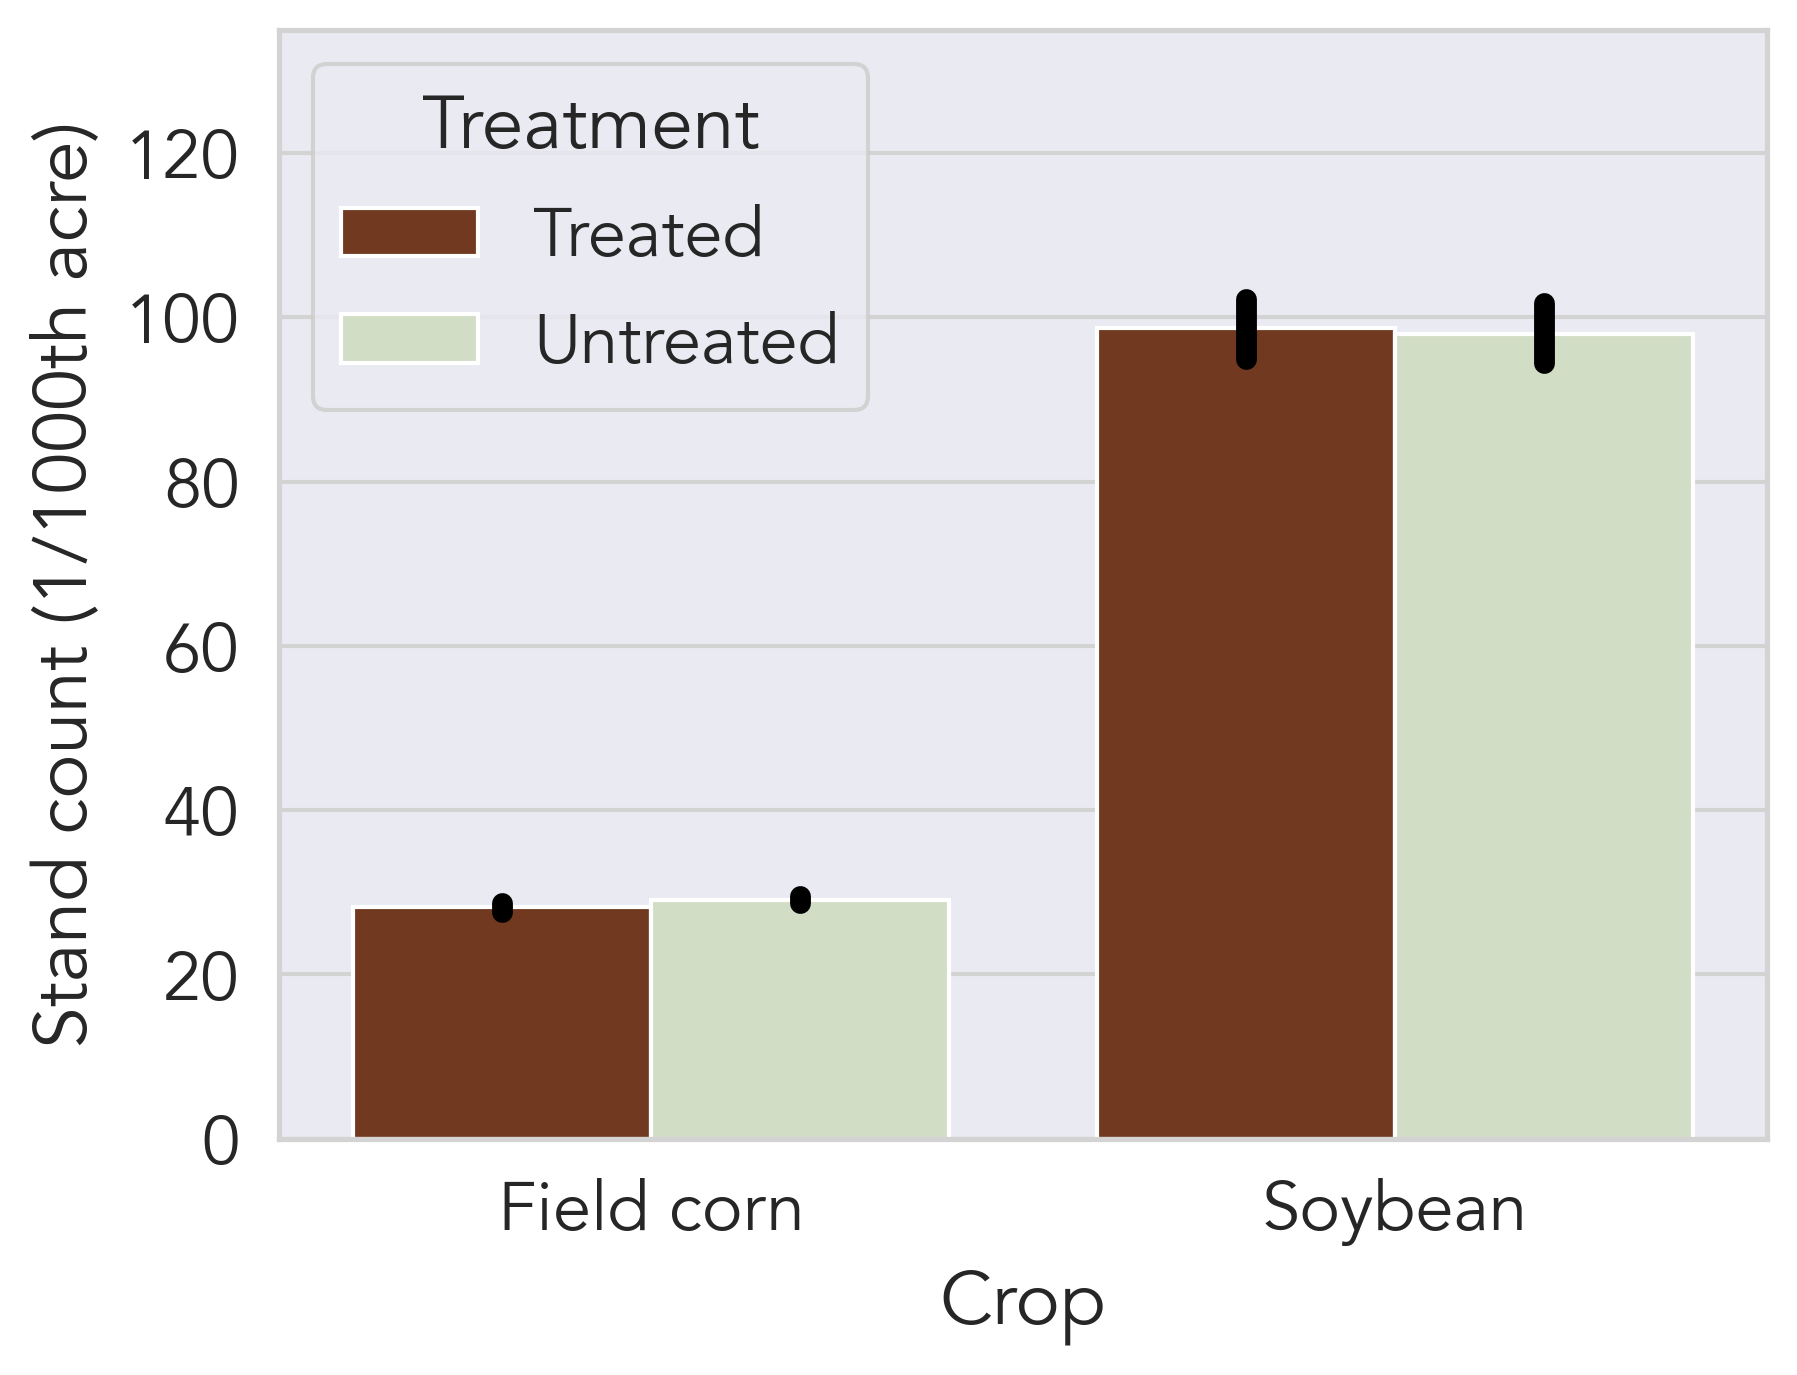

In [129]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

field_crop_stand['Treatment'] = field_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = field_crop_stand, x = 'Crop', y = 'Stand count', hue = 'Treatment', palette=palette, order=['Field corn', 'Soybean'], hue_order=hue_order, err_kws={'linewidth': 5, 'color':'black'})
plt.ylim(0, 135)
plt.ylabel('Stand count (1/1000th acre)')

In [88]:
for site in sites: 
    table_name = site + '_stand'
    table_name = field_crop_stand.loc[field_crop_stand['Field ID'] == site]
    table_name = table_name.groupby('Treatment').mean('Stand count').reset_index()
    table_name['Treatment'] = table_name['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
    table_name['Crop'] = crop_dict[site]

    plt.rcParams.update({"figure.dpi": 300})
    sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

    field_crop_stand['Treatment'] = field_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})

    palette = ['#7e3412', '#d2e1c1']
    hue_order = ['Treated', 'Untreated']
    ax = sns.barplot(data = field_crop_stand, x = 'Crop', y = 'Stand count', hue = 'Treatment', palette=palette, order=['Field corn', 'Soybean'], hue_order=hue_order, err_kws={'linewidth': 5, 'color':'black'})
    plt.ylim(0, 135)
    plt.ylabel('Stand count (1/1000th acre)')


    ax2 = ax.twinx()
    sns.stripplot(data=table_name, x='Crop', y='Stand count', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
    plt.ylim(0, 135)
    plt.ylabel('')
    ax2.set_yticks([])

    plt.tight_layout()
    plt.savefig('Stand Graphs/' + site + '_stand.png')
    plt.close()

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/2964446844.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_crop_stand['Treatment'] = field_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/2964446844.py:21: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Stand count', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/2964446844.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [90]:
field_crop_biomass = biomass[(biomass['Crop'] != 'Sweet corn') & (biomass['Crop'] != 'Snap bean')]
field_crop_biomass

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Number of plants,Total weight (g),Notes,Untared weight (g)
0,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,1,V3,15,79.7,NaN,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,2,V3,15,73.8,NaN,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,3,V3,15,73.4,NaN,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,4,V3,15,78.6,NaN,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,5,V3,15,97.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
949,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,5,V4,15,45.5,NaN,NaN
950,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,6,V4,15,47.8,NaN,NaN
951,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,7,V4,15,48.2,NaN,NaN
952,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,8,V4,15,42.2,NaN,NaN


In [91]:
sites = field_crop_biomass['Field ID'].unique()
sites

array(['CHO_GEN', 'KUH_COL', 'MIL_COB', 'MIL_CRO_1', 'MIL_CRO_2',
       'MIL_BAR_1', 'MIL_TEL', 'MIL_ZIT_2', 'STA_REE_2', 'STA_REE_1',
       'STA_FRE', 'STA_WOO', 'STA_MAC', 'STA_BLO', 'STA_WIL', 'STA_MAR',
       'STA_STA', 'STA_KRE', 'DEG_DIE_1', 'DEG_FRI_1', 'DEG_FRI_2',
       'DEG_LAF_1', 'DEG_LAF_2', 'MIL_ZIT_3', 'DEG_VIL_1', 'DEG_PER_1',
       'DEG_PER_2', 'MIL_ZIT_1', 'MIL_BAR_2', 'CER_DEL_1', 'CER_DEL_2',
       'DEG_FOU', 'LET_MAC', 'LET_STE', 'LET_VER', 'LET_WAT', 'SMI_CON_2',
       'SMI_BUR', 'SMI_HOF_1', 'SMI_COB', 'SMI_MCC', 'SMI_ARN_1',
       'SMI_LAT', 'SMI_ARN_2', 'SMI_DOU', 'SMI_CON_1', 'SMI_HOF_2'],
      dtype=object)

In [126]:
crop_dict = pd.Series(field_crop_biomass.Crop.values, index = field_crop_biomass['Field ID']).to_dict()
print(Counter(crop_dict.values()))
crop_dict

Counter({'Field corn': 32, 'Soybean': 15})


{'CHO_GEN': 'Soybean',
 'KUH_COL': 'Field corn',
 'MIL_COB': 'Soybean',
 'MIL_CRO_1': 'Field corn',
 'MIL_CRO_2': 'Field corn',
 'MIL_BAR_1': 'Soybean',
 'MIL_TEL': 'Field corn',
 'MIL_ZIT_2': 'Field corn',
 'STA_REE_2': 'Soybean',
 'STA_REE_1': 'Soybean',
 'STA_FRE': 'Soybean',
 'STA_WOO': 'Field corn',
 'STA_MAC': 'Field corn',
 'STA_BLO': 'Field corn',
 'STA_WIL': 'Field corn',
 'STA_MAR': 'Field corn',
 'STA_STA': 'Field corn',
 'STA_KRE': 'Field corn',
 'DEG_DIE_1': 'Field corn',
 'DEG_FRI_1': 'Field corn',
 'DEG_FRI_2': 'Soybean',
 'DEG_LAF_1': 'Field corn',
 'DEG_LAF_2': 'Soybean',
 'MIL_ZIT_3': 'Field corn',
 'DEG_VIL_1': 'Field corn',
 'DEG_PER_1': 'Field corn',
 'DEG_PER_2': 'Soybean',
 'MIL_ZIT_1': 'Soybean',
 'MIL_BAR_2': 'Soybean',
 'CER_DEL_1': 'Field corn',
 'CER_DEL_2': 'Field corn',
 'DEG_FOU': 'Field corn',
 'LET_MAC': 'Field corn',
 'LET_STE': 'Field corn',
 'LET_VER': 'Field corn',
 'LET_WAT': 'Field corn',
 'SMI_CON_2': 'Field corn',
 'SMI_BUR': 'Field corn',
 'SMI

In [95]:
for site in sites: 

    table_name = site + '_biomass'
    table_name = field_crop_biomass.loc[field_crop_biomass['Field ID'] == site]
    table_name = table_name.groupby('Treatment').mean('Total weight (g)').reset_index()
    table_name['Treatment'] = table_name['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
    table_name['Crop'] = crop_dict[site]
    table_name['Avg weight'] = table_name['Total weight (g)'] / table_name['Number of plants']

    plt.rcParams.update({"figure.dpi": 300})
    sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

    biomass['Treatment'] = biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
    biomass['Avg weight'] = biomass['Total weight (g)'] / biomass['Number of plants']

    palette = ['#7e3412', '#d2e1c1']
    hue_order = ['Treated', 'Untreated']
    ax = sns.barplot(data = biomass, x = 'Crop', y = 'Avg weight', hue = 'Treatment', palette=palette, order=['Field corn', 'Soybean'], hue_order=hue_order, err_kws={'linewidth': 5, 'color':'black'})
    plt.ylim(0, 30)
    plt.ylabel('Avg weight/plant (g)')

    ax2 = ax.twinx()
    sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
    plt.ylim(0, 30)
    plt.ylabel('')
    ax2.set_yticks([])

    plt.tight_layout()
    plt.savefig('Biomass Graphs/' + site + '_biomass.png')
    plt.close()

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/2540770314.py:23: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/2540770314.py:23: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/2540770314.py:23: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Avg weight

In [99]:
table_name = 'CER_DEL_1' + '_biomass'
table_name = field_crop_biomass.loc[field_crop_biomass['Field ID'] == 'CER_DEL_1']
table_name = table_name.groupby('Treatment').mean('Total weight (g)').reset_index()
table_name['Treatment'] = table_name['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
table_name['Crop'] = crop_dict['CER_DEL_1']
table_name['Avg weight'] = table_name['Total weight (g)'] / table_name['Number of plants']
table_name

plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

biomass['Treatment'] = biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
biomass['Avg weight'] = biomass['Total weight (g)'] / biomass['Number of plants']

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = biomass, x = 'Crop', y = 'Avg weight', hue = 'Treatment', palette=palette, order=['Field corn', 'Soybean'], hue_order=hue_order, err_kws={'linewidth': 5, 'color':'black'})
plt.ylim(0, 60)
plt.ylabel('Avg weight/plant (g)')

ax2 = ax.twinx()
sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
plt.ylim(0, 60)
plt.ylabel('')
ax2.set_yticks([])

plt.tight_layout()
plt.savefig('Biomass Graphs/' + 'CER_DEL_1' + '_biomass.png')
plt.close()


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/106461751.py:22: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,


In [101]:
table_name = 'CER_DEL_2' + '_biomass'
table_name = field_crop_biomass.loc[field_crop_biomass['Field ID'] == 'CER_DEL_2']
table_name = table_name.groupby('Treatment').mean('Total weight (g)').reset_index()
table_name['Treatment'] = table_name['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
table_name['Crop'] = crop_dict['CER_DEL_2']
table_name['Avg weight'] = table_name['Total weight (g)'] / table_name['Number of plants']
table_name

plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

biomass['Treatment'] = biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
biomass['Avg weight'] = biomass['Total weight (g)'] / biomass['Number of plants']

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = biomass, x = 'Crop', y = 'Avg weight', hue = 'Treatment', palette=palette, order=['Field corn', 'Soybean'], hue_order=hue_order, err_kws={'linewidth': 5, 'color':'black'})
plt.ylim(0, 40)
plt.ylabel('Avg weight/plant (g)')

ax2 = ax.twinx()
sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
plt.ylim(0, 40)
plt.ylabel('')
ax2.set_yticks([])

plt.tight_layout()
plt.savefig('Biomass Graphs/' + 'CER_DEL_2' + '_biomass.png')
plt.close()

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/2207635300.py:22: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,


In [103]:
table_name = 'DEG_FRI_1' + '_biomass'
table_name = field_crop_biomass.loc[field_crop_biomass['Field ID'] == 'DEG_FRI_1']
table_name = table_name.groupby('Treatment').mean('Total weight (g)').reset_index()
table_name['Treatment'] = table_name['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
table_name['Crop'] = crop_dict['DEG_FRI_1']
table_name['Avg weight'] = table_name['Total weight (g)'] / table_name['Number of plants']
table_name

plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

biomass['Treatment'] = biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
biomass['Avg weight'] = biomass['Total weight (g)'] / biomass['Number of plants']

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = biomass, x = 'Crop', y = 'Avg weight', hue = 'Treatment', palette=palette, order=['Field corn', 'Soybean'], hue_order=hue_order, err_kws={'linewidth': 5, 'color':'black'})
plt.ylim(0, 60)
plt.ylabel('Avg weight/plant (g)')

ax2 = ax.twinx()
sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
plt.ylim(0, 60)
plt.ylabel('')
ax2.set_yticks([])

plt.tight_layout()
plt.savefig('Biomass Graphs/' + 'DEG_FRI_1' + '_biomass.png')
plt.close()

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/1338184416.py:22: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,


In [104]:
table_name = 'DEG_LAF_1' + '_biomass'
table_name = field_crop_biomass.loc[field_crop_biomass['Field ID'] == 'DEG_LAF_1']
table_name = table_name.groupby('Treatment').mean('Total weight (g)').reset_index()
table_name['Treatment'] = table_name['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
table_name['Crop'] = crop_dict['DEG_LAF_1']
table_name['Avg weight'] = table_name['Total weight (g)'] / table_name['Number of plants']
table_name

plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

biomass['Treatment'] = biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
biomass['Avg weight'] = biomass['Total weight (g)'] / biomass['Number of plants']

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = biomass, x = 'Crop', y = 'Avg weight', hue = 'Treatment', palette=palette, order=['Field corn', 'Soybean'], hue_order=hue_order, err_kws={'linewidth': 5, 'color':'black'})
plt.ylim(0, 40)
plt.ylabel('Avg weight/plant (g)')

ax2 = ax.twinx()
sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
plt.ylim(0, 40)
plt.ylabel('')
ax2.set_yticks([])

plt.tight_layout()
plt.savefig('Biomass Graphs/' + 'DEG_LAF_1' + '_biomass.png')
plt.close()

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/2799917377.py:22: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,


In [105]:
table_name = 'MIL_TEL' + '_biomass'
table_name = field_crop_biomass.loc[field_crop_biomass['Field ID'] == 'MIL_TEL']
table_name = table_name.groupby('Treatment').mean('Total weight (g)').reset_index()
table_name['Treatment'] = table_name['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
table_name['Crop'] = crop_dict['MIL_TEL']
table_name['Avg weight'] = table_name['Total weight (g)'] / table_name['Number of plants']
table_name

plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

biomass['Treatment'] = biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
biomass['Avg weight'] = biomass['Total weight (g)'] / biomass['Number of plants']

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = biomass, x = 'Crop', y = 'Avg weight', hue = 'Treatment', palette=palette, order=['Field corn', 'Soybean'], hue_order=hue_order, err_kws={'linewidth': 5, 'color':'black'})
plt.ylim(0, 40)
plt.ylabel('Avg weight/plant (g)')

ax2 = ax.twinx()
sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
plt.ylim(0, 40)
plt.ylabel('')
ax2.set_yticks([])

plt.tight_layout()
plt.savefig('Biomass Graphs/' + 'MIL_TEL' + '_biomass.png')
plt.close()

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/1533484939.py:22: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,


In [108]:
table_name = 'SMI_CON_2' + '_biomass'
table_name = field_crop_biomass.loc[field_crop_biomass['Field ID'] == 'SMI_CON_2']
table_name = table_name.groupby('Treatment').mean('Total weight (g)').reset_index()
table_name['Treatment'] = table_name['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
table_name['Crop'] = crop_dict['SMI_CON_2']
table_name['Avg weight'] = table_name['Total weight (g)'] / table_name['Number of plants']
table_name

plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

biomass['Treatment'] = biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
biomass['Avg weight'] = biomass['Total weight (g)'] / biomass['Number of plants']

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = biomass, x = 'Crop', y = 'Avg weight', hue = 'Treatment', palette=palette, order=['Field corn', 'Soybean'], hue_order=hue_order, err_kws={'linewidth': 5, 'color':'black'})
plt.ylim(0, 52)
plt.ylabel('Avg weight/plant (g)')

ax2 = ax.twinx()
sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
plt.ylim(0, 52)
plt.ylabel('')
ax2.set_yticks([])

plt.tight_layout()
plt.savefig('Biomass Graphs/' + 'SMI_CON_2' + '_biomass.png')
plt.close()

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/2959691064.py:22: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=table_name, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,


In [123]:
sites = silage_yield['Field ID'].unique()
print(len(sites))
sites

14


array(['KUH_COL', 'MIL_CRO_2', 'MIL_CRO_1', 'SMI_LAT', 'LET_STE',
       'LET_MAC', 'LET_VER', 'LET_WAT', 'STA_MAC', 'DEG_VIL', 'DEG_PER_1',
       'DEG_FOU', 'DEG_DIE', 'SMI_COB'], dtype=object)

In [111]:
crop_dict = pd.Series(silage_yield.Crop.values, index = silage_yield['Field ID']).to_dict()
crop_dict

{'KUH_COL': 'Field corn',
 'MIL_CRO_2': 'Field corn',
 'MIL_CRO_1': 'Field corn',
 'SMI_LAT': 'Field corn',
 'LET_STE': 'Field corn',
 'LET_MAC': 'Field corn',
 'LET_VER': 'Field corn',
 'LET_WAT': 'Field corn',
 'STA_MAC': 'Field corn',
 'DEG_VIL': 'Field corn',
 'DEG_PER_1': 'Field corn',
 'DEG_FOU': 'Field corn',
 'DEG_DIE': 'Field corn',
 'SMI_COB': 'Field corn'}

In [116]:
silage_yield['Treatment'] = silage_yield['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})


In [119]:
for site in sites:

    table_name = site + '_silage_yield'
    table_name = silage_yield.loc[silage_yield['Field ID'] == site]
    table_name = table_name.groupby('Treatment').mean('Yield (dry matter)').reset_index()
    table_name['Treatment'] = table_name['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
    table_name['Crop'] = crop_dict[site]

    plt.rcParams.update({"figure.dpi": 300})
    sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

    palette = ['#7e3412', '#d2e1c1']
    ax = sns.barplot(data = silage_yield, x = 'Treatment', y = 'Yield (dry matter)', palette=palette, err_kws={'linewidth': 5, 'color':'black'})
    ax.set_ylim(0, 11)
    plt.ylabel('Yield (dry matter - tons/ac)')

    ax2 = ax.twinx()
    sns.stripplot(data=table_name, x='Treatment', y='Yield (dry matter)', palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
    plt.ylim(0, 11)
    plt.ylabel('')
    ax2.set_yticks([])

    plt.tight_layout()
    plt.savefig('Silage Yield Graphs/' + site + '_silage_yield.png')
    plt.close()
    

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/1769750666.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = silage_yield, x = 'Treatment', y = 'Yield (dry matter)', palette=palette, err_kws={'linewidth': 5, 'color':'black'})
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/1769750666.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=table_name, x='Treatment', y='Yield (dry matter)', palette= ['yellow'], size = 15, jitter=False,
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/1769750666.py:18: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plo

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/4102819975.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = silage_yield, x = 'Treatment', y = 'Yield (dry matter)', palette=palette, err_kws={'linewidth': 5, 'color':'black'})


Text(0, 0.5, 'Yield (dry matter - tons/ac)')

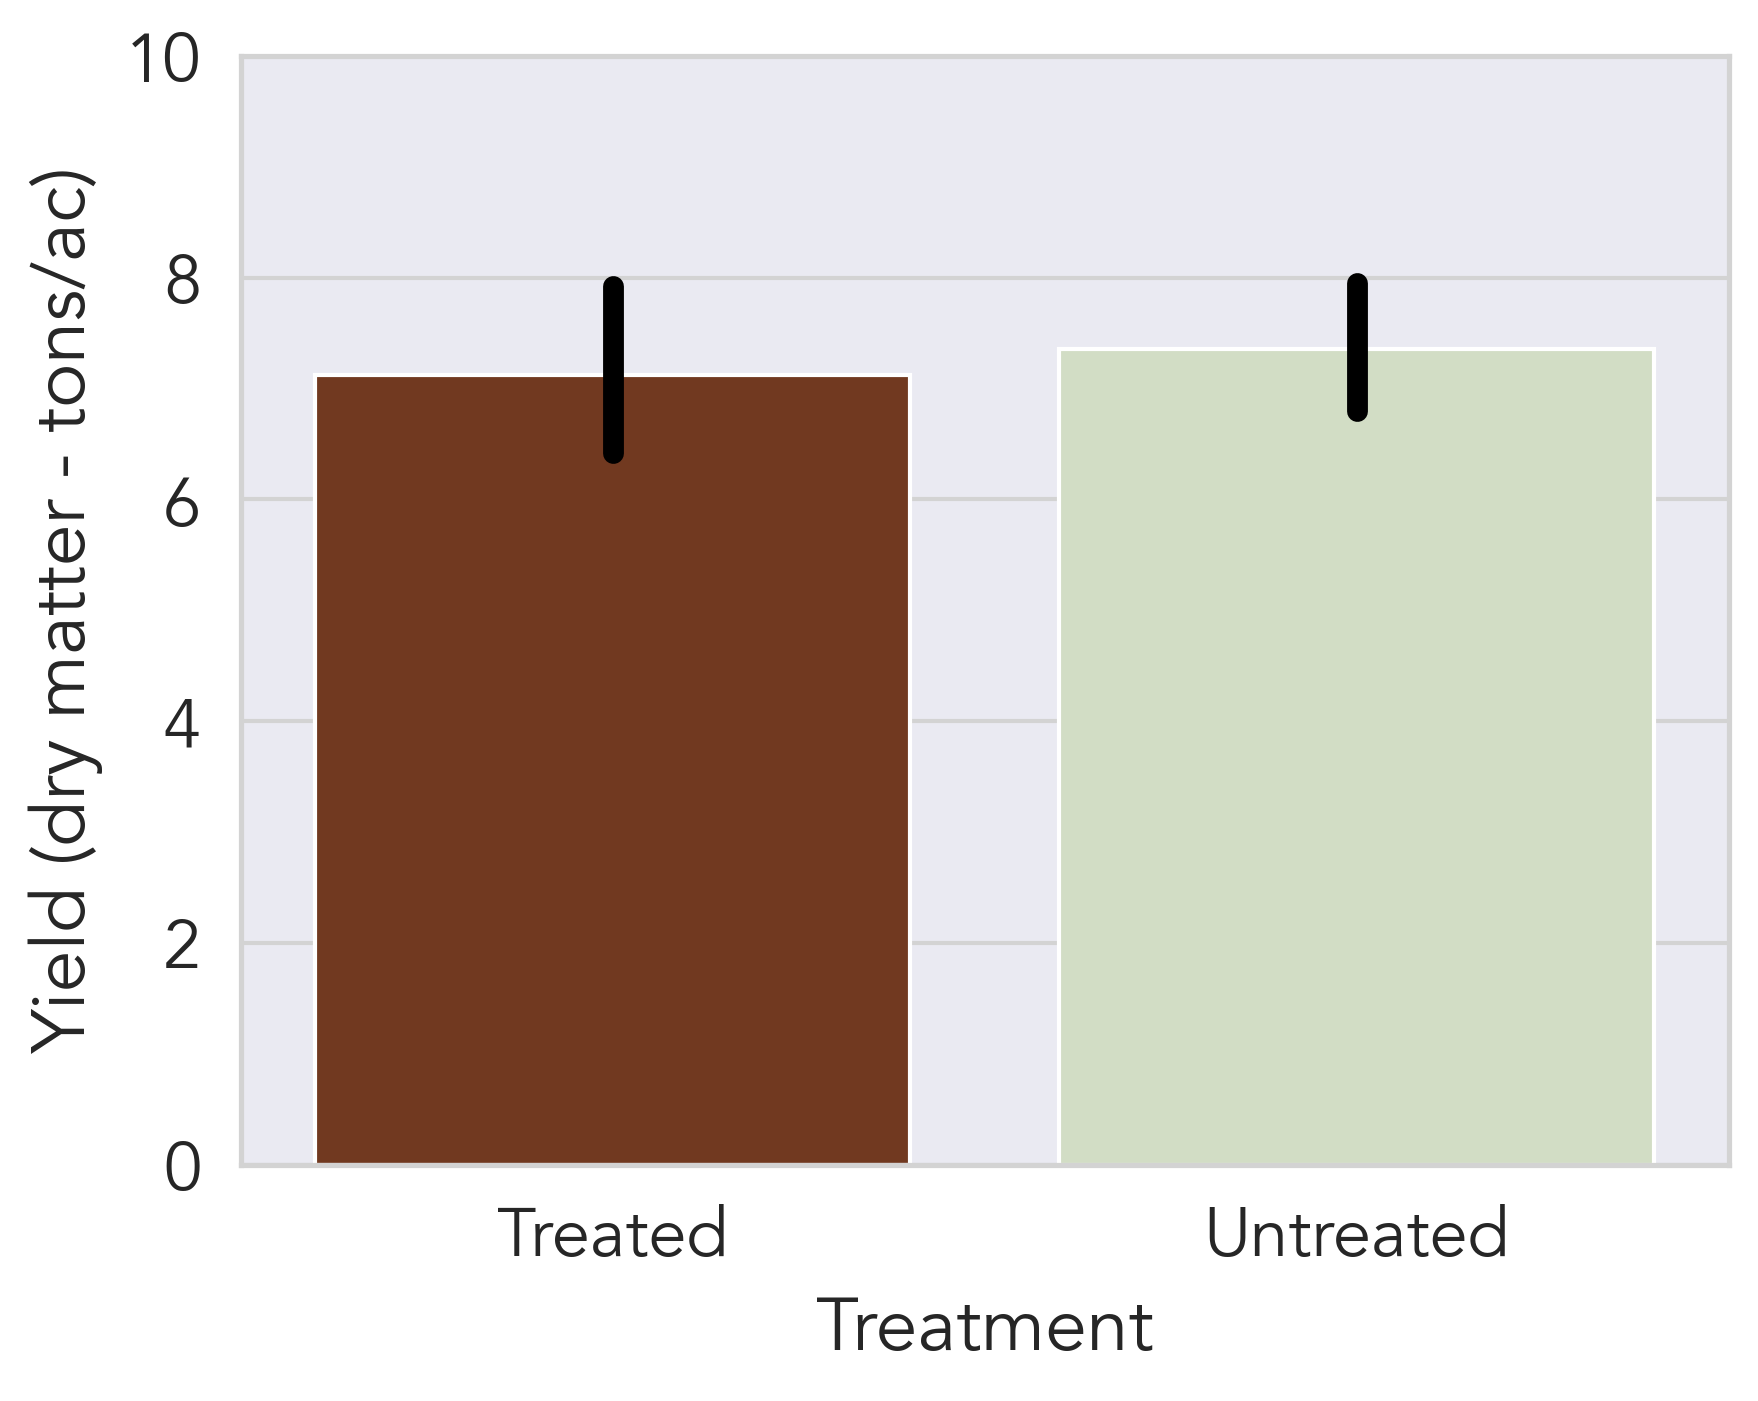

In [142]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = silage_yield, x = 'Treatment', y = 'Yield (dry matter)', palette=palette, err_kws={'linewidth': 5, 'color':'black'})
ax.set_ylim(0, 10)
plt.ylabel('Yield (dry matter - tons/ac)')

In [141]:
soy_yield['Treatment'] = soy_yield['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
print(len(soy_yield['Field ID'].unique()))
soy_yield


14


,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Yield (bu/acre)
0,Katelyn Miller,MIL_COB,10/17/2025,Harvest,Soybean,Treated,57.50
1,Katelyn Miller,MIL_COB,10/17/2025,Harvest,Soybean,Untreated,54.70
2,Erik Smith,SMI_ARN_2,10/27/2025,Harvest,Soybean,Treated,32.52
3,Erik Smith,SMI_ARN_2,10/27/2025,Harvest,Soybean,Untreated,33.81
4,Janice Degni,DEG_LAF_2,10/15/2025,Harvest,Soybean,Treated,50.99
5,Janice Degni,DEG_LAF_2,10/15/2025,Harvest,Soybean,Untreated,42.18
6,Mike Stanyard,STA_FRE,10/6/2025,Harvest,Soybean,Treated,35.70
7,Mike Stanyard,STA_FRE,10/6/2025,Harvest,Soybean,Untreated,40.26
8,Mike Stanyard,STA_REE_2,9/30/2025,Harvest,Soybean,Treated,48.43
9,Mike Stanyard,STA_REE_2,9/30/2025,Harvest,Soybean,Untreated,57.79


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/3881491338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = soy_yield, x = 'Treatment', y = 'Yield (bu/acre)', palette=palette, err_kws={'linewidth': 5, 'color':'black'})


Text(0, 0.5, 'Yield (bu/acre)')

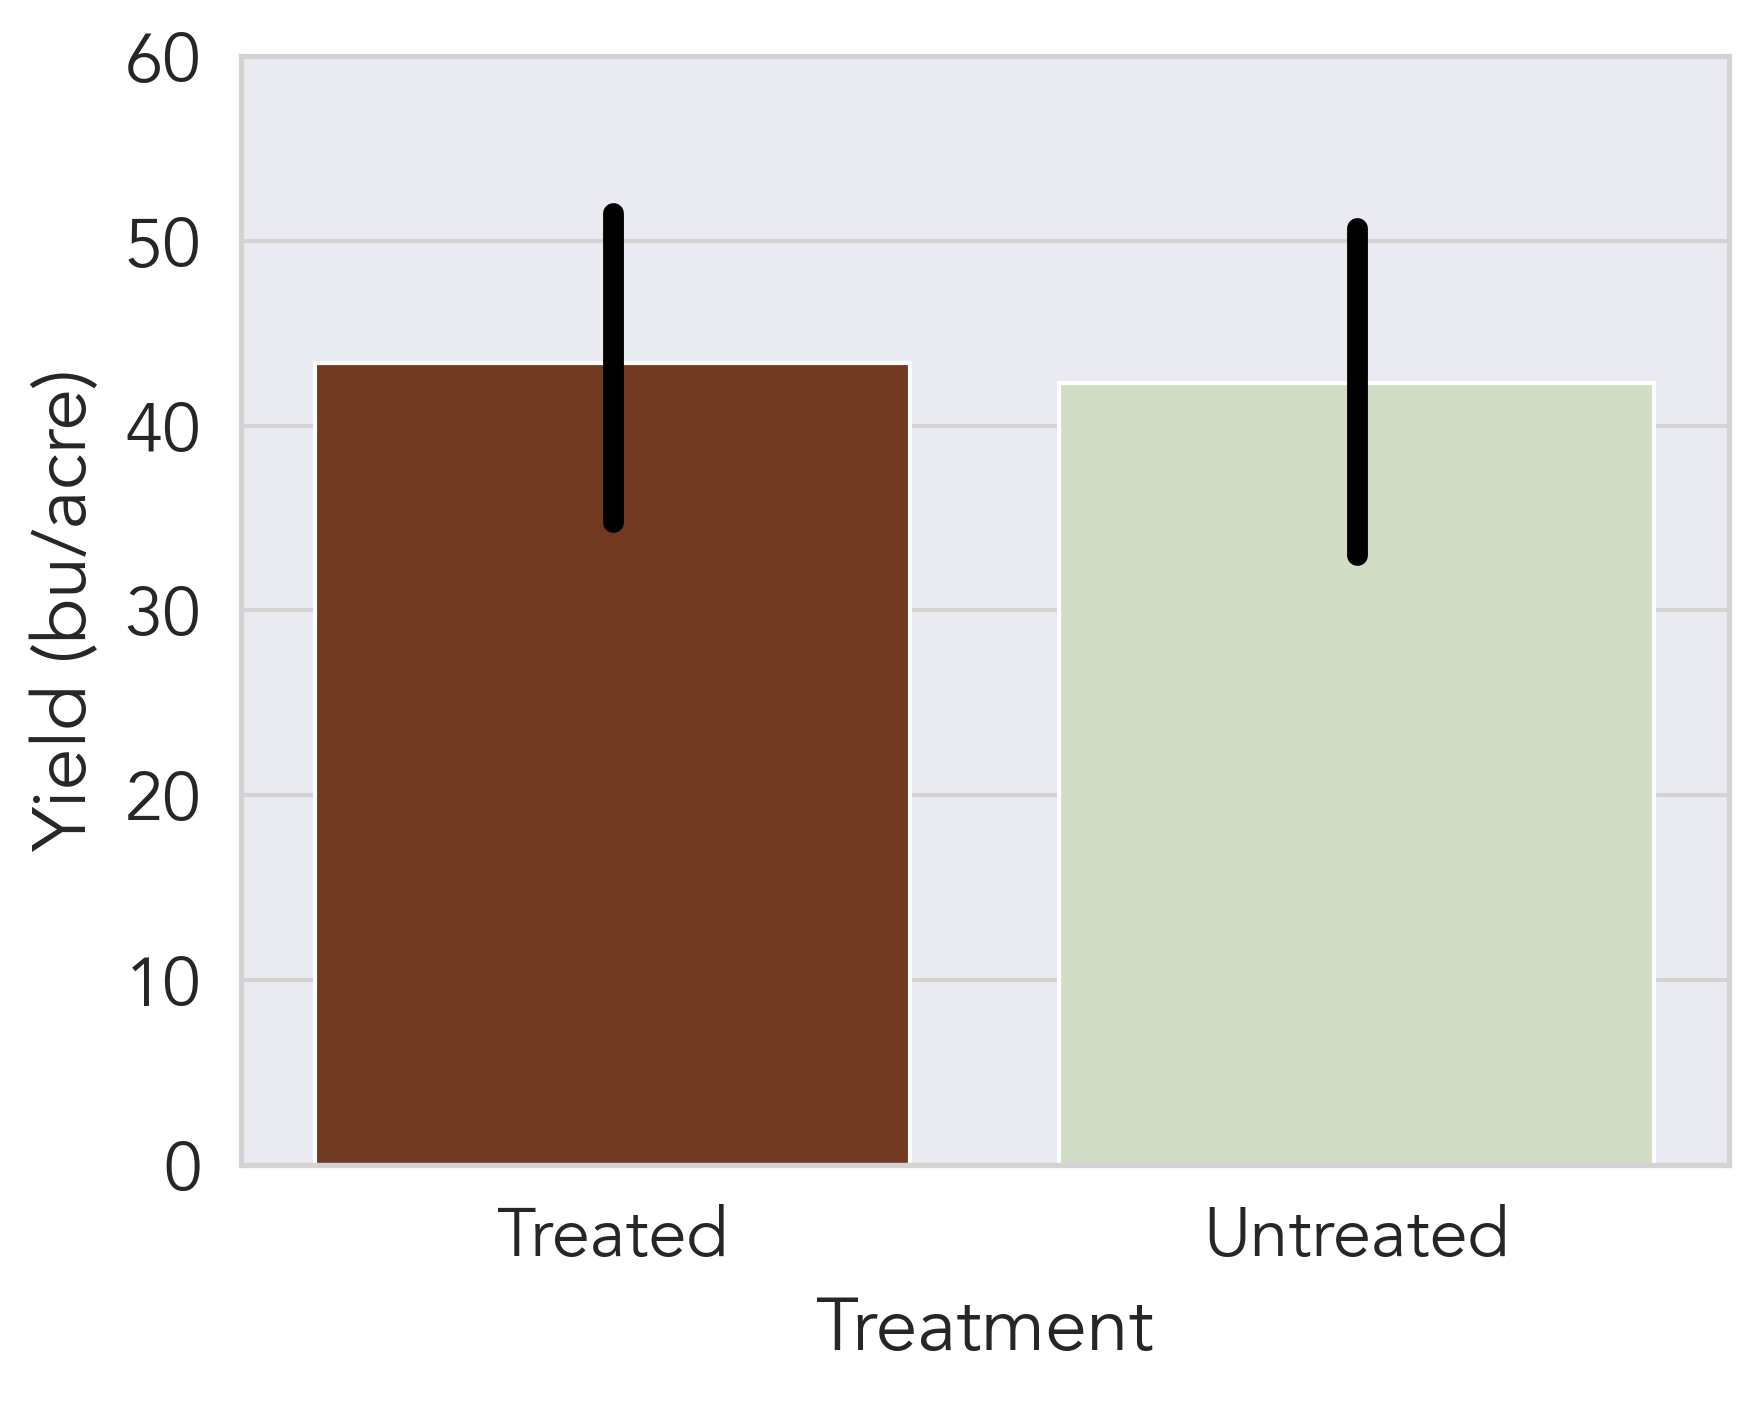

In [139]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = soy_yield, x = 'Treatment', y = 'Yield (bu/acre)', palette=palette, err_kws={'linewidth': 5, 'color':'black'})
ax.set_ylim(0, 60)
plt.ylabel('Yield (bu/acre)')

In [144]:
grain_yield['Treatment'] = grain_yield['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
print(len(grain_yield['Field ID'].unique()))
grain_yield

11


,Data Collector,Field ID,Date,Sampling period,Crop,Grain or Silage,Treatment,Yield (bu/acre)
0,Mike Stanyard,STA_MAR,10/27/2025,Harvest,Field corn,Grain,Treated,187.6695
1,Mike Stanyard,STA_MAR,10/27/2025,Harvest,Field corn,Grain,Untreated,190.9152
2,Mike Stanyard,STA_WIL,10/24/2025,Harvest,Field corn,Grain,Treated,178.2600
3,Mike Stanyard,STA_WIL,10/24/2025,Harvest,Field corn,Grain,Untreated,229.9200
4,Katelyn Miller,MIL_ZIT_2,11/7/2025,Harvest,Field corn,Grain,Treated,118.1000
5,Katelyn Miller,MIL_ZIT_2,11/7/2025,Harvest,Field corn,Grain,Untreated,93.0700
6,Katelyn Miller,MIL_ZIT_3,11/25/2025,Harvest,Field corn,Grain,Treated,124.0000
7,Katelyn Miller,MIL_ZIT_3,11/25/2025,Harvest,Field corn,Grain,Untreated,134.8000
8,Janice Degni,DEG_FRI_1,11/4/2025,Harvest,Field corn,Grain,Treated,87.0700
9,Janice Degni,DEG_FRI_1,11/4/2025,Harvest,Field corn,Grain,Untreated,42.3900


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_93884/20609133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = grain_yield, x = 'Treatment', y = 'Yield (bu/acre)', palette=palette, err_kws={'linewidth': 5, 'color':'black'})


Text(0, 0.5, 'Yield (bu/acre)')

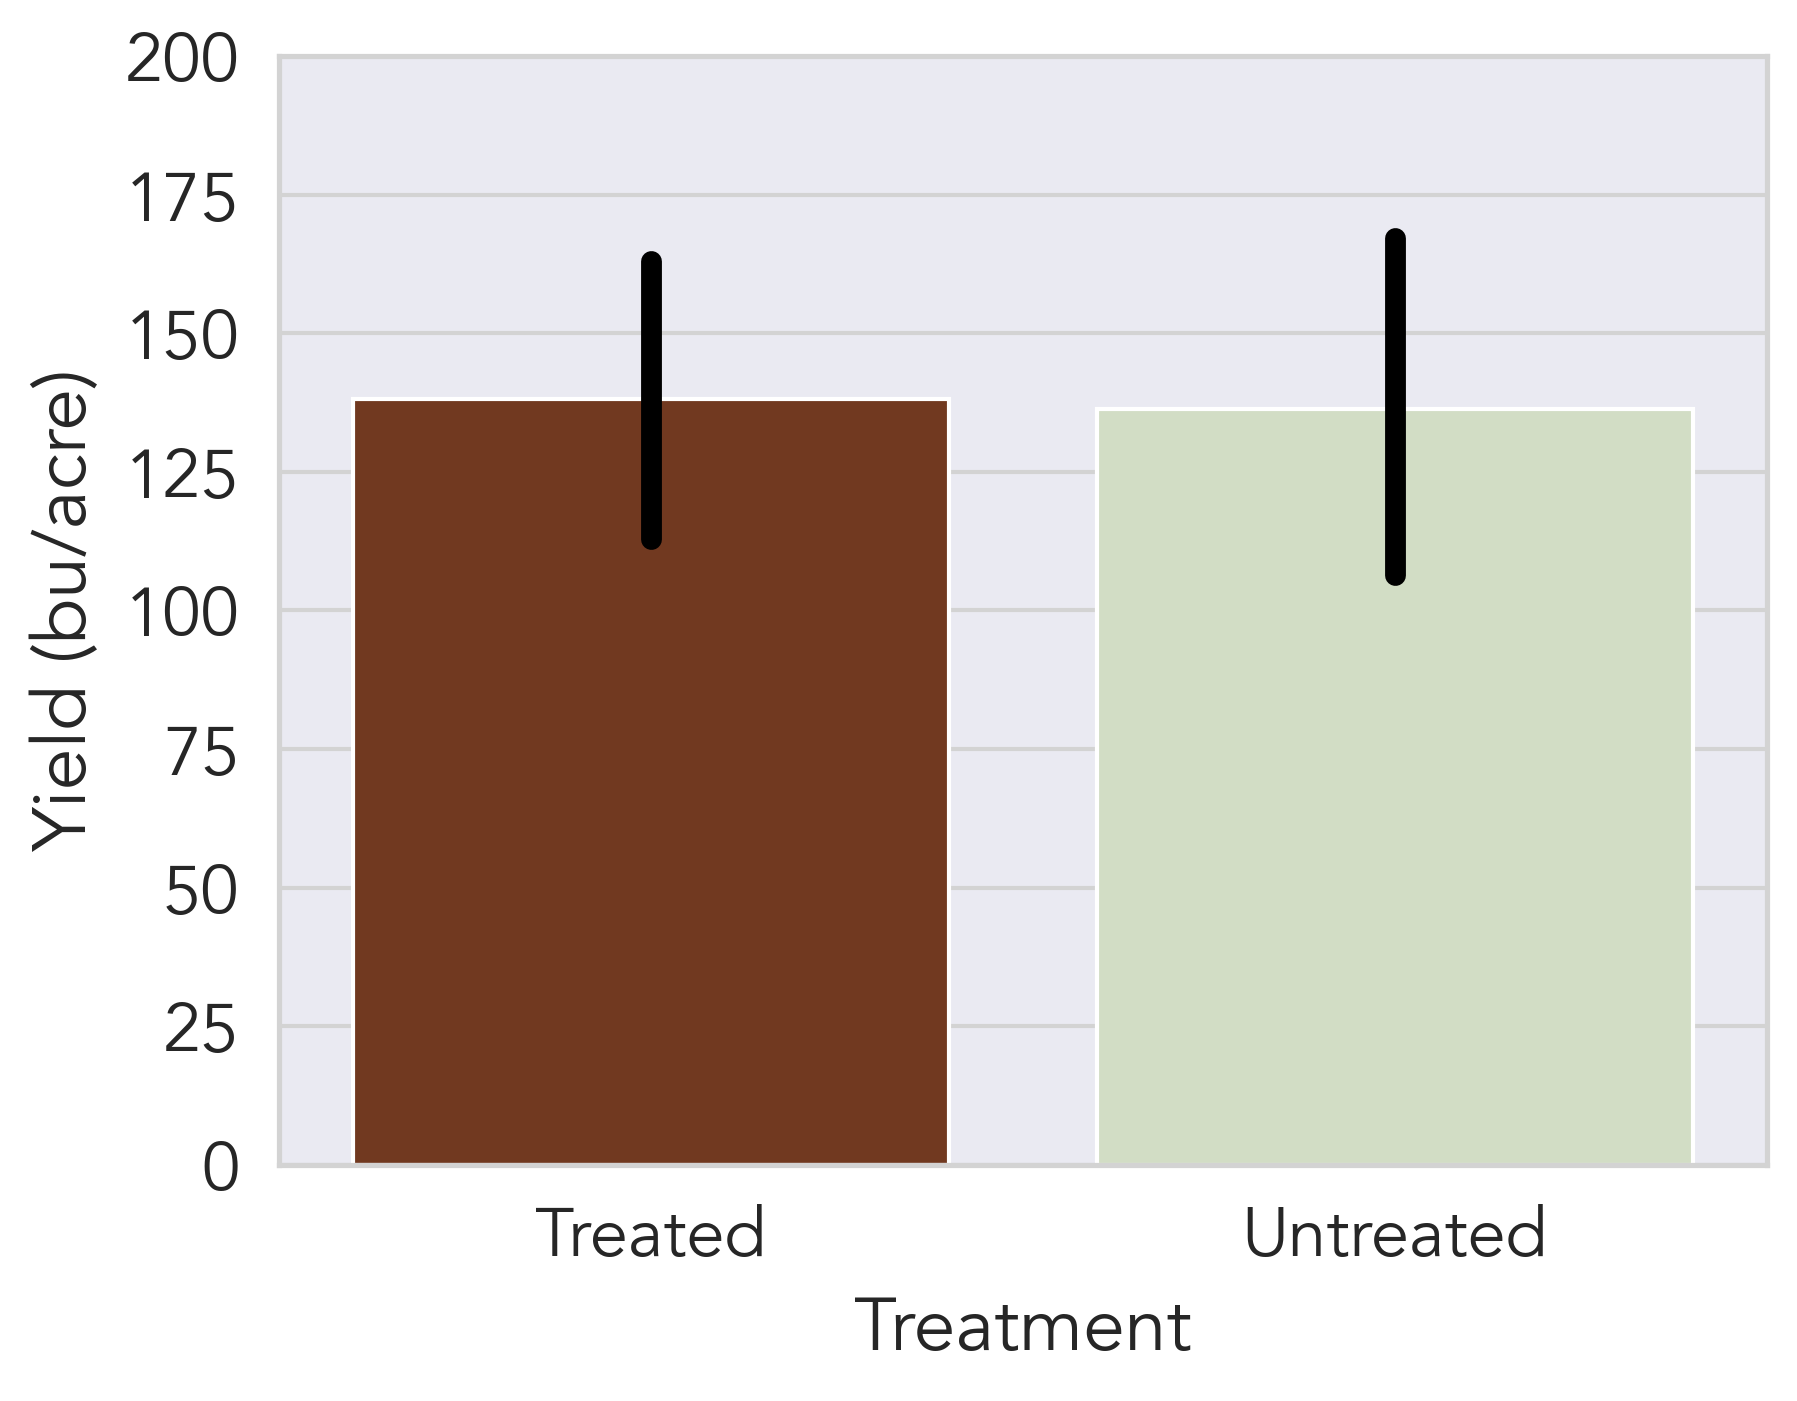

In [149]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = grain_yield, x = 'Treatment', y = 'Yield (bu/acre)', palette=palette, err_kws={'linewidth': 5, 'color':'black'})
ax.set_ylim(0, 200)
plt.ylabel('Yield (bu/acre)')

In [150]:
t1 = grain_yield.loc[grain_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Yield (bu/acre)'].mean()
t2 = grain_yield.loc[grain_yield['Treatment'] == 'Treated'].groupby('Field ID')['Yield (bu/acre)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.24157580411026533, pvalue=0.8139904228251742, df=10)

In [151]:
t1 = silage_yield.loc[silage_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Yield (dry matter)'].mean()
t2 = silage_yield.loc[silage_yield['Treatment'] == 'Treated'].groupby('Field ID')['Yield (dry matter)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=0.9028050186080208, pvalue=0.3830529449350125, df=13)

In [152]:
t1 = soy_yield.loc[soy_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Yield (bu/acre)'].mean()
t2 = soy_yield.loc[soy_yield['Treatment'] == 'Treated'].groupby('Field ID')['Yield (bu/acre)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.8109903379006885, pvalue=0.4319687978489076, df=13)